<a href="https://colab.research.google.com/github/Kakumanu-Harshitha/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Project Title: Fraud Detection using Machine Learning
**Description**: Developed a machine learning model to detect fraudulent transactions in financial data using classification algorithms. The project involved exploratory data analysis (EDA), handling class imbalance with SMOTE, and training models such as Random Forest and Decision tree Classifier Evaluated models using precision, recall, ROC-AUC score, and confusion matrix.
**Key Highlights**:

Conducted EDA to understand transaction patterns.

Applied feature encoding and scaling techniques.

Used SMOTE to address severe class imbalance.

Evaluated using classification report, confusion matrix, and ROC-AUC.

Achieved a significant boost in fraud detection recall after resampling.

Tech Stack: Python, Pandas, NumPy, Scikit-learn, Seaborn, Matplotlib, imbalanced-learn (SMOTE)

# 1.Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 2.Import Dataset



In [ ]:
df = pd.read_csv("Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


# 3.Data Preprocessing

In [ ]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Shape: (1132654, 11)

Columns: ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

Data Types:
 step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           float64
isFlaggedFraud    float64
dtype: object

Missing Values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64


To find the missing column we use ...

In [ ]:
df[df.isnull().any(axis=1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1132653,131,CASH_IN,115365.72,C1359304499,953585.88,1068951.6,C1694934976,102155.0,NaN,NaN,NaN


In [ ]:
df.fillna(0, inplace=True)

To know the info we use df.info()

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 314698 entries, 0 to 314697
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            314698 non-null  int64  
 1   type            314698 non-null  object 
 2   amount          314698 non-null  float64
 3   nameOrig        314698 non-null  object 
 4   oldbalanceOrg   314698 non-null  float64
 5   newbalanceOrig  314698 non-null  float64
 6   nameDest        314698 non-null  object 
 7   oldbalanceDest  314698 non-null  float64
 8   newbalanceDest  314698 non-null  float64
 9   isFraud         314698 non-null  float64
 10  isFlaggedFraud  314698 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 28.8+ MB


To know the info we use df.describe()

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,314698.000000,3.146980e+05,3.146980e+05,3.146980e+05,3.146980e+05,3.146980e+05,314698.000000,314698.0
mean,11.636200,1.757444e+05,8.865920e+05,9.054732e+05,9.786492e+05,1.194413e+06,0.000594,0.0
std,2.725426,2.986538e+05,2.867410e+06,2.904734e+06,2.367532e+06,2.587206e+06,0.024369,0.0
min,1.000000,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,10.000000,1.286143e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,12.000000,7.864286e+04,1.835857e+04,0.000000e+00,8.890536e+04,1.949259e+05,0.000000,0.0
75%,14.000000,2.317330e+05,1.812713e+05,2.201000e+05,8.624901e+05,1.236109e+06,0.000000,0.0
max,16.000000,1.000000e+07,3.893942e+07,3.894623e+07,4.133844e+07,4.138365e+07,1.000000,0.0


In [ ]:
# Check transaction types
print(df['type'].value_counts())

type
CASH_OUT    110890
PAYMENT     108498
CASH_IN      66718
TRANSFER     26274
DEBIT         2318
Name: count, dtype: int64


This is used to convert categorical text data into numerical values

In [ ]:
df['type'] = df['type'].astype('category').cat.codes

#4. Exploratory Data Analysis

# a. Class Distribution (Fraud vs Non-Fraud)

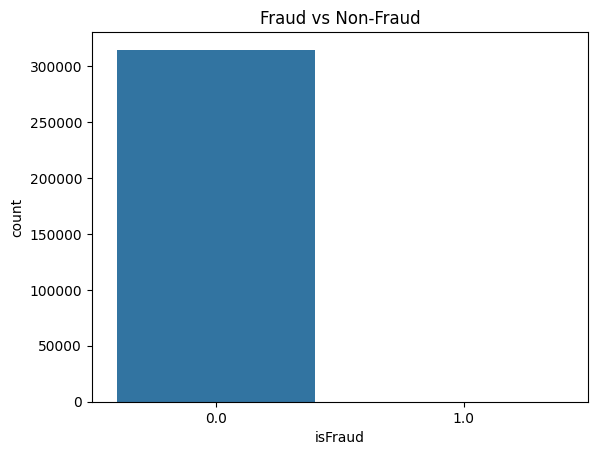

In [ ]:
sns.countplot(data=df, x='isFraud')
plt.title("Fraud vs Non-Fraud")
plt.show()

In [ ]:
fraud_percent = df['isFraud'].mean() * 100
print(f"Fraudulent transactions: {fraud_percent:.4f}%")

Fraudulent transactions: 0.0594%


# b. Transaction Types

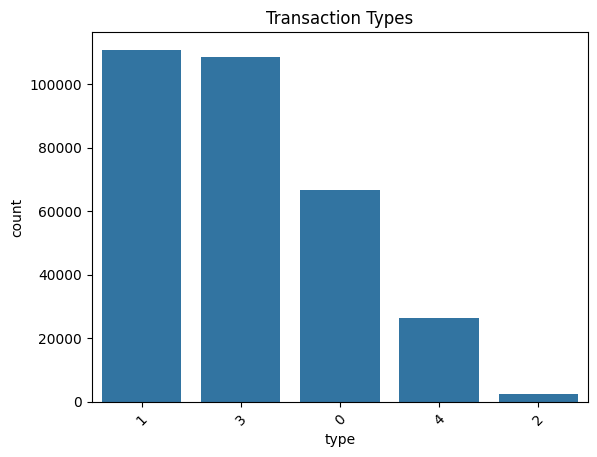

type
4    0.003464
1    0.000866
0    0.000000
2    0.000000
3    0.000000
Name: isFraud, dtype: float64


In [ ]:
sns.countplot(data=df, x='type', order=df['type'].value_counts().index)
plt.title("Transaction Types")
plt.xticks(rotation=45)
plt.show()
# Fraud % by transaction type
fraud_by_type = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
print(fraud_by_type)


# c. Transaction Amounts (Fraud vs Non-Fraud)

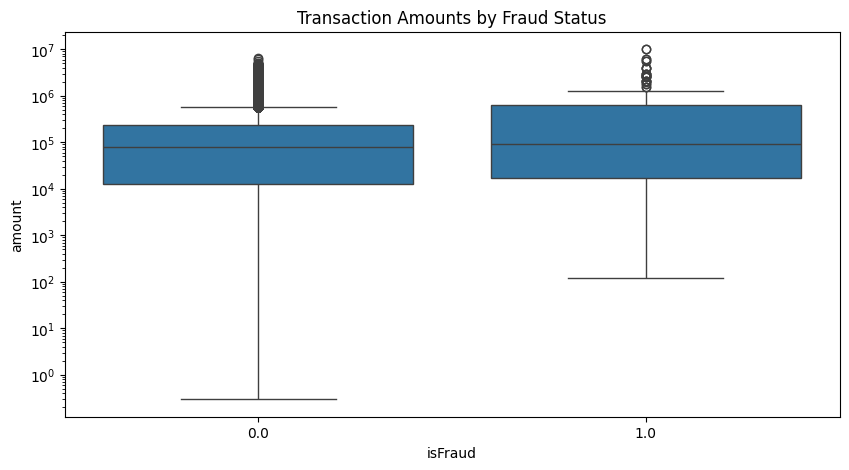

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.yscale('log')  # log scale due to extreme values
plt.title("Transaction Amounts by Fraud Status")
plt.show()

# d.Visualizing the Distribution of Balance-Related Features

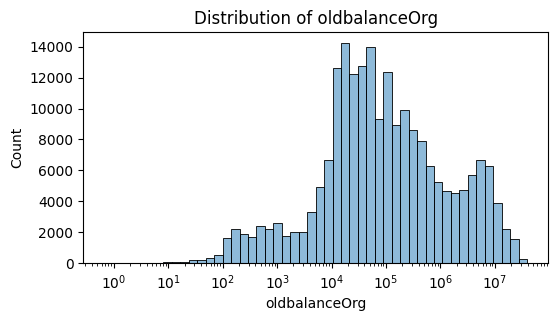

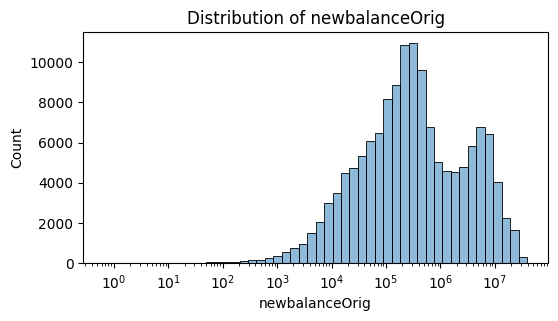

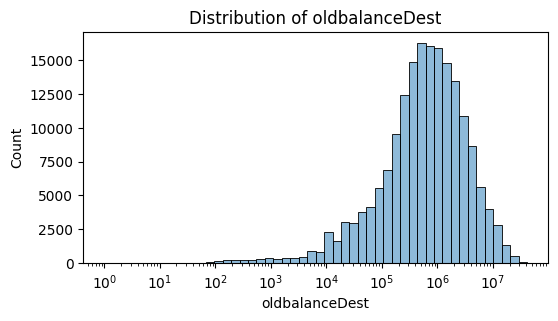

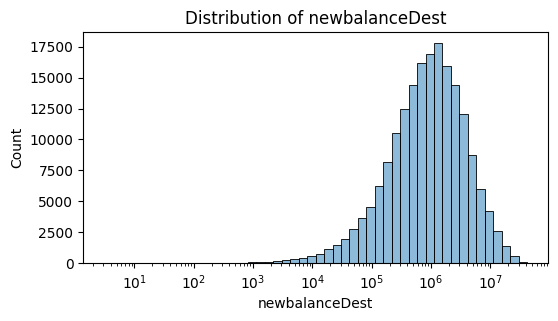

In [ ]:
cols = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for col in cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], bins=50, log_scale=(True, False), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Splitting into Dependent and Independent features

In [ ]:
X = df[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
y = df['isFraud']

# Splitting into Train and Test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# Balencing the Data

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

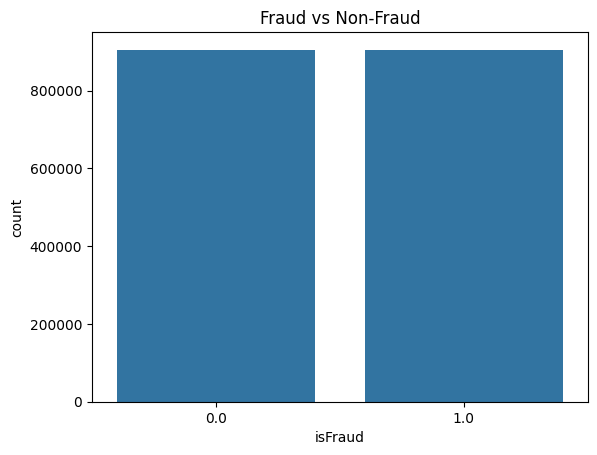

In [ ]:
sns.countplot( x=y_train_resampled)
plt.title("Fraud vs Non-Fraud")
plt.show()

#5. Build The Model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
def evaluate_classification_model(y_true, y_pred, labels=None):
    print("=== Classification Metrics ===")
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    # Precision
    precision = precision_score(y_true, y_pred, average='weighted')
    print(f"Precision: {precision:.2f}")
    # Recall
    recall = recall_score(y_true, y_pred, average='weighted')
    print(f"Recall: {recall:.2f}")
    # F1 Score
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"F1 Score: {f1:.2f}")
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    # Confusion Matrix
    print("\nConfusion Matrix:")
    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


# Random Forest Classifier

=== Classification Metrics ===
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     62903
         1.0       0.13      0.65      0.22        37

    accuracy                           1.00     62940
   macro avg       0.57      0.82      0.61     62940
weighted avg       1.00      1.00      1.00     62940


Confusion Matrix:


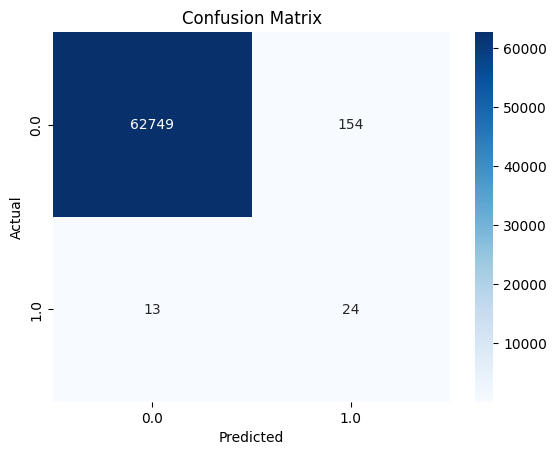

ROC-AUC Score: 0.9681033990128947


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier= RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)
y_pred=rf_classifier.predict(X_test)
evaluate_classification_model(y_test, y_pred, labels=df['isFraud'].unique())
print("ROC-AUC Score:", roc_auc_score(y_test,rf_classifier.predict_proba(X_test)[:, 1]))

# Decision Tree Classifier

=== Classification Metrics ===
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     62903
         1.0       0.12      0.70      0.21        37

    accuracy                           1.00     62940
   macro avg       0.56      0.85      0.60     62940
weighted avg       1.00      1.00      1.00     62940


Confusion Matrix:


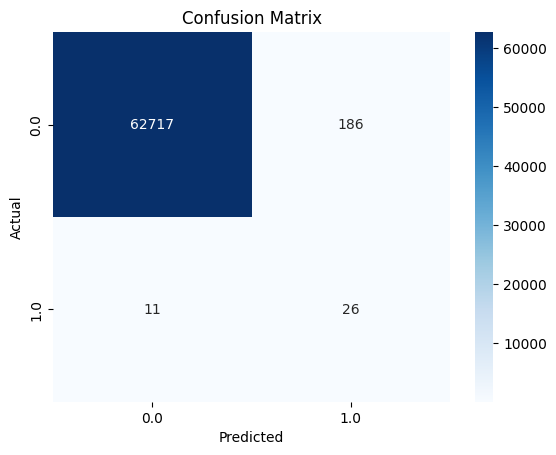

ROC-AUC Score: 0.8498728845055729


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_resampled, y_train_resampled)
y_pred = dt_classifier.predict(X_test)
evaluate_classification_model(y_test, y_pred, labels=df['isFraud'].unique())
print("ROC-AUC Score:", roc_auc_score(y_test,dt_classifier.predict_proba(X_test)[:, 1]))

# 6.Selecting the best model

# The best model is Random Forest Classifier